# Melbourne House Analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_column',100)
mh = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
mh.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
mh.shape

(34857, 21)

In [5]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [6]:
mh.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [7]:
# landsize di isi dari rata2 type nya tersebut bray 
# building area di isi berdasarkan landsize 
# bathroom dan bedroom diisi berdasarkan building area
# price di isi dengan facility 
# car bisa diisi dengan landsize nya
# landsize di isi dengan building tyep
# Bedroom2 
# Longitude dan Latitude 

## Check Percentage Missing Value each Column & Data Corelation

In [8]:
total = mh.isnull().sum().sort_values(ascending=False)
percent = ((mh.isnull().sum()/mh.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys = ['Total','Percent'])
missing_data

,Total,Percent
BuildingArea,21115,60.576068
YearBuilt,19306,55.386293
Landsize,11810,33.881286
Car,8728,25.039447
Bathroom,8226,23.599277
Bedroom2,8217,23.573457
Longtitude,7976,22.882061
Lattitude,7976,22.882061
Price,7610,21.832057
Regionname,3,0.008607


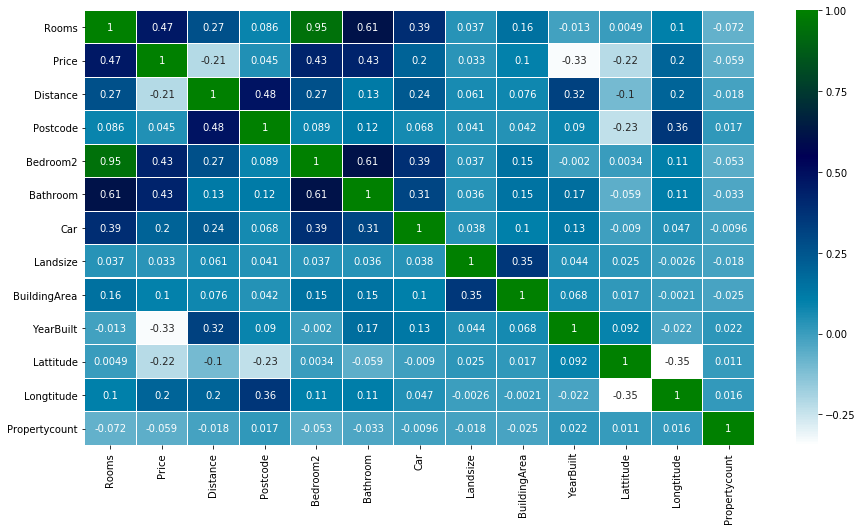

In [9]:
# Show corelation between another column 
figure = plt.figure(figsize=(15,8))
sns.heatmap(mh.corr(), cmap ='ocean_r', linewidth = 0.1, annot=True)

## Cleaning Data

 #### Drop all column Year Built & row property count

In [10]:
mh.drop('YearBuilt', axis = 1, inplace=True)

In [11]:
mh.dropna(subset=['Propertycount'],inplace=True)

In [12]:
mh.drop('Bedroom2', axis =1, inplace=True)

#### Fill Data Landsize

In [13]:
group_Landsize = round(mh.groupby(['Type','Rooms']).mean()['Landsize'])
group_Landsize

Type  Rooms
h     1         330.0
      2         364.0
      3         624.0
      4         726.0
      5         863.0
      6        1174.0
      7        1008.0
      8        1571.0
      9        1021.0
      10        595.0
      12        960.0
      16          NaN
t     1         346.0
      2         310.0
      3         282.0
      4         340.0
      5         266.0
      8         650.0
      9           NaN
u     1         409.0
      2         512.0
      3         447.0
      4         274.0
      5           NaN
      6           0.0
      8         983.0
Name: Landsize, dtype: float64

In [14]:
def applyLandsize(x):
    if (x['Landsize']) > 0:
        return x['Landsize']
    else :
        return (group_Landsize.loc[x['Type']][x['Rooms']])

In [15]:
mh['Landsize'] = mh[['Landsize','Type','Rooms']].apply(applyLandsize,axis = 1)

In [16]:
# Drop Nan yang ada di Landsize (tidak bisa di korelasikan)
mh.dropna(subset=['Landsize'],inplace=True)

#### Fill Data Building Area 

In [17]:
group_BuildingArea = mh.groupby(['Type','Landsize']).mean()['BuildingArea']
group_BuildingArea

Type  Landsize
h     1.0         102.000000
      5.0                NaN
      29.0               NaN
      34.0               NaN
      35.0               NaN
      36.0               NaN
      43.0        205.000000
      45.0               NaN
      46.0               NaN
      50.0        141.000000
      55.0               NaN
      56.0        106.000000
      57.0        110.000000
      58.0        118.333333
      60.0        128.333333
      61.0        112.000000
      63.0               NaN
      64.0        125.000000
      66.0         99.500000
      67.0         72.000000
      69.0               NaN
      70.0         87.150000
      71.0         85.500000
      72.0               NaN
      73.0        104.000000
      74.0         95.000000
      75.0        106.000000
      76.0        129.000000
      78.0        110.000000
      79.0         81.000000
                     ...    
u     5973.0             NaN
      6111.0             NaN
      6186.0             NaN

In [18]:
# Contoh Penggunaan argmin
# mencari nilai terkecil dari function yang di inputkan
np.argmin(abs(mh[(mh['BuildingArea'].notnull())]['Landsize'] - 79))

186

In [19]:
def applyBuildingArea(x):
    buildingArea_notnull = mh[(mh['Type']==x['Type']) & (mh['BuildingArea'].notnull())]['Landsize']
    if pd.notnull(x['BuildingArea']):
        return x['BuildingArea']
    else:
        idx = np.argmin(np.abs(buildingArea_notnull - x['Landsize']))
        return round(mh.groupby(['Landsize','Type']).mean()['BuildingArea'].loc[mh['Landsize'][idx]][x['Type']])

In [20]:
mh['BuildingArea'] = mh[['BuildingArea','Type','Landsize']].apply(applyBuildingArea,axis = 1)

#### Fill Data Bathroom

In [21]:
group_Bathroom = round(mh.groupby(['BuildingArea','Rooms']).mean()['Bathroom'])
group_Bathroom

BuildingArea  Rooms
0.0000        2        1.0
              3        2.0
              4        2.0
              5        2.0
              6        2.0
0.0100        3        2.0
1.0000        1        2.0
              2        1.0
              3        2.0
              4        2.0
              5        4.0
2.0000        1        0.0
              2        1.0
3.0000        3        2.0
4.0000        3        2.0
              4        2.0
5.0000        5        3.0
              6        1.0
7.0000        1        1.0
9.0000        2        1.0
10.0000       2        1.0
11.0000       3        2.0
12.0000       2        1.0
13.0000       2        1.0
              3        1.0
14.0000       3        2.0
              4        2.0
15.0000       1        1.0
              2        1.0
              3        2.0
                      ... 
808.0000      4        1.0
826.8367      5        3.0
836.0000      4        4.0
857.0000      4        3.0
859.0000      4        2.0
924.0000

In [22]:
def applyBathroom(x):
    bathroom_notnull = mh[(mh['Rooms'] == x['Rooms']) & (mh['Bathroom'].notnull())]['BuildingArea']
    if pd.notnull(x['Bathroom']):
        return x['Bathroom']
    else:
        idx = np.argmin(np.abs(bathroom_notnull - x['BuildingArea']))
        return round(group_Bathroom.loc[mh['BuildingArea'][idx]][x['Rooms']])

In [23]:
mh['Bathroom'] = mh[['Bathroom','Rooms','BuildingArea']].apply(applyBathroom,axis = 1)

In [24]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34851 entries, 0 to 34856
Data columns (total 19 columns):
Suburb           34851 non-null object
Address          34851 non-null object
Rooms            34851 non-null int64
Type             34851 non-null object
Price            27243 non-null float64
Method           34851 non-null object
SellerG          34851 non-null object
Date             34851 non-null object
Distance         34851 non-null float64
Postcode         34851 non-null float64
Bathroom         34851 non-null float64
Car              26127 non-null float64
Landsize         34851 non-null float64
BuildingArea     34851 non-null float64
CouncilArea      34851 non-null object
Lattitude        26878 non-null float64
Longtitude       26878 non-null float64
Regionname       34851 non-null object
Propertycount    34851 non-null float64
dtypes: float64(10), int64(1), object(8)
memory usage: 6.6+ MB


#### Fill Data Car

In [25]:
group_car= round(mh.groupby(['Distance','Type']).mean()['Car'])
group_car

Distance  Type
0.0       u       0.0
0.7       h       1.0
          u       1.0
1.2       h       0.0
          u       1.0
1.3       h       2.0
          t       1.0
          u       1.0
1.4       h       3.0
          u       NaN
1.5       h       2.0
          t       1.0
          u       1.0
1.6       h       1.0
          t       1.0
          u       1.0
1.8       h       1.0
          t       1.0
          u       1.0
1.9       h       1.0
          t       1.0
          u       1.0
2.0       h       1.0
          t       1.0
          u       1.0
2.1       h       1.0
          t       1.0
          u       1.0
2.3       h       1.0
          t       1.0
                 ... 
34.1      u       1.0
34.6      h       2.0
34.7      h       2.0
34.9      h       2.0
          u       2.0
35.2      h       2.0
          u       NaN
35.4      h       2.0
          t       1.0
          u       2.0
35.5      h       1.0
36.9      h       2.0
37.5      h       3.0
38.0      h      

In [26]:
def applyCar(x): 
    car_notnull = mh[(mh['Type'] == x['Type']) & (mh['Car'].notnull())]['Distance']
    if pd.notnull(x['Car']):
        return x['Car']
    else:
        idx = np.argmin(np.abs(car_notnull - x['Distance']))
        return round(group_car.loc[mh['Distance'][idx]][x['Type']])

In [27]:
mh['Car'] = mh[['Car','Distance','Type']].apply(applyCar, axis=1)

#### Fill Data Bedroom2

In [28]:
# group_bedroom2 = round(mh.groupby(['Rooms','Type']).mean()['Bedroom2'])
# group_bedroom2

In [29]:
# def applyBedroom2(x):
#     if pd.notnull(x['Bedroom2']):
#         return x['Bedroom2']
#     else :
#         return group_bedroom2.loc[x['Rooms']][x['Type']]

In [30]:
# mh['Bedroom2'] = mh[['Bedroom2', 'Rooms','Type']].apply(applyBedroom2, axis =1)

In [31]:
# mh.info()

#### Fill Data Longitude 

##### Fill Data with Suburb

In [32]:
group_Longitude = round(mh.groupby('Suburb').mean()['Longtitude'],4)
group_Longitude

Suburb
Abbotsford            144.9974
Aberfeldie            144.8973
Airport West          144.8796
Albanvale             144.7696
Albert Park           144.9533
Albion                144.8189
Alphington            145.0287
Altona                144.8211
Altona Meadows        144.7809
Altona North          144.8493
Ardeer                144.8019
Armadale              145.0191
Ascot Vale            144.9161
Ashburton             145.0805
Ashwood               145.1040
Aspendale             145.1014
Aspendale Gardens     145.1196
Attwood               144.8891
Avondale Heights      144.8607
Avonsleigh            145.4674
Bacchus Marsh         144.4339
Balaclava             144.9949
Balwyn                145.0821
Balwyn North          145.0854
Bayswater             145.2598
Bayswater North       145.2829
Beaconsfield          145.3791
Beaconsfield Upper    145.4104
Beaumaris             145.0390
Belgrave              145.3443
                        ...   
Wallan                144.9804
W

In [33]:
def applyLong(x):
    if pd.notnull(x['Longtitude']):
        return x['Longtitude']
    else:
        return group_Longitude.loc[x['Suburb']]

In [34]:
mh['Longtitude'] = mh[['Longtitude', 'Suburb']].apply(applyLong,axis = 1)

##### Fill Data with Postcode

In [35]:
group_Longitude1 = round(mh.groupby('Postcode').mean()['Longtitude'],4)
group_Longitude1

Postcode
3000.0    144.9626
3002.0    144.9846
3003.0    144.9478
3006.0    144.9650
3008.0    144.9429
3011.0    144.8922
3012.0    144.8713
3013.0    144.8839
3015.0    144.8778
3016.0    144.8912
3018.0    144.8242
3019.0    144.8516
3020.0    144.8251
3021.0    144.8021
3022.0    144.8019
3023.0    144.7620
3024.0    144.6187
3025.0    144.8493
3027.0    144.7409
3028.0    144.7760
3029.0    144.6911
3030.0    144.6955
3031.0    144.9282
3032.0    144.9046
3033.0    144.8659
3034.0    144.8607
3036.0    144.8264
3037.0    144.7538
3038.0    144.7957
3039.0    144.9198
            ...   
3437.0    144.5816
3438.0    144.5963
3750.0    145.0279
3752.0    145.0829
3754.0    145.0976
3756.0    144.9804
3757.0    145.1202
3765.0    145.3517
3770.0    145.3846
3775.0    145.3739
3777.0    145.5250
3782.0    145.4519
3786.0    145.3286
3788.0         NaN
3793.0    145.4129
3795.0    145.4503
3796.0    145.3801
3802.0    145.2618
3803.0    145.2697
3805.0    145.3034
3806.0    145.3450
380

In [36]:
def applyLong1(x):
    if pd.notnull(x['Longtitude']):
        return x['Longtitude']
    else:
        return group_Longitude1.loc[x['Postcode']]

In [37]:
mh['Longtitude']= mh[['Longtitude', 'Postcode']].apply(applyLong1,axis = 1)

##### Fill Data with Council Area

In [38]:
group_Longitude2 = round(mh.groupby('CouncilArea').mean()['Longtitude'],4)
group_Longitude2

CouncilArea
Banyule City Council              145.0766
Bayside City Council              145.0187
Boroondara City Council           145.0666
Brimbank City Council             144.8196
Cardinia Shire Council            145.4417
Casey City Council                145.2910
Darebin City Council              144.9996
Frankston City Council            145.1487
Glen Eira City Council            145.0489
Greater Dandenong City Council    145.1859
Hobsons Bay City Council          144.8629
Hume City Council                 144.8972
Kingston City Council             145.0933
Knox City Council                 145.2547
Macedon Ranges Shire Council      144.5989
Manningham City Council           145.1358
Maribyrnong City Council          144.8818
Maroondah City Council            145.2581
Melbourne City Council            144.9590
Melton City Council               144.6454
Mitchell Shire Council            144.9804
Monash City Council               145.1288
Moonee Valley City Council        144.9025

In [39]:
# Nan at Yarra Ranges Shire Council fillna with mean from Yarra Ranges Shire Council
mh[mh['Longtitude'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18669,Olinda,30 Monash Av,4,h,NaN,SA,Fletchers,15/07/2017,30.6,3788.0,2.0,2.0,726.0,209.0,Yarra Ranges Shire Council,NaN,NaN,Eastern Victoria,794.0


In [40]:
mh['Longtitude'].fillna(145.3354, inplace=True)

#### Fill Data Latitude

##### Fill Data with Suburb

In [41]:
group_Latitude= round(mh.groupby('Suburb').mean()['Lattitude'],4)
group_Latitude

Suburb
Abbotsford           -37.8041
Aberfeldie           -37.7592
Airport West         -37.7233
Albanvale            -37.7451
Albert Park          -37.8444
Albion               -37.7805
Alphington           -37.7784
Altona               -37.8666
Altona Meadows       -37.8794
Altona North         -37.8348
Ardeer               -37.7784
Armadale             -37.8567
Ascot Vale           -37.7764
Ashburton            -37.8672
Ashwood              -37.8656
Aspendale            -38.0218
Aspendale Gardens    -38.0214
Attwood              -37.6716
Avondale Heights     -37.7612
Avonsleigh           -37.9212
Bacchus Marsh        -37.6701
Balaclava            -37.8707
Balwyn               -37.8093
Balwyn North         -37.7927
Bayswater            -37.8484
Bayswater North      -37.8258
Beaconsfield         -38.0543
Beaconsfield Upper   -38.0039
Beaumaris            -37.9830
Belgrave             -37.9126
                       ...   
Wallan               -37.4088
Wandin North         -37.7700
Wan

In [42]:
def applyLat(x):
    if pd.notnull(x['Lattitude']):
        return x['Lattitude']
    else:
        return group_Latitude.loc[x['Suburb']]

In [43]:
mh['Lattitude'] = mh[['Lattitude', 'Suburb']].apply(applyLat,axis = 1)

##### Fill Data with Postcode

In [44]:
group_Latitude1= round(mh.groupby('Postcode').mean()['Lattitude'],4)
group_Latitude1

Postcode
3000.0   -37.8130
3002.0   -37.8150
3003.0   -37.8082
3006.0   -37.8263
3008.0   -37.8180
3011.0   -37.7990
3012.0   -37.7968
3013.0   -37.8168
3015.0   -37.8391
3016.0   -37.8597
3018.0   -37.8662
3019.0   -37.7858
3020.0   -37.7838
3021.0   -37.7413
3022.0   -37.7784
3023.0   -37.7520
3024.0   -37.8891
3025.0   -37.8348
3027.0   -37.8565
3028.0   -37.8761
3029.0   -37.8618
3030.0   -37.8905
3031.0   -37.7901
3032.0   -37.7765
3033.0   -37.7420
3034.0   -37.7612
3036.0   -37.7178
3037.0   -37.7028
3038.0   -37.7076
3039.0   -37.7659
           ...   
3437.0   -37.4961
3438.0   -37.4643
3750.0   -37.6145
3752.0   -37.6356
3754.0   -37.6002
3756.0   -37.4088
3757.0   -37.5103
3765.0   -37.8082
3770.0   -37.7246
3775.0   -37.6539
3777.0   -37.6495
3782.0   -37.9275
3786.0   -37.8773
3788.0        NaN
3793.0   -37.8793
3795.0   -37.8398
3796.0   -37.7854
3802.0   -37.9767
3803.0   -38.0023
3805.0   -38.0191
3806.0   -38.0414
3807.0   -38.0486
3808.0   -38.0039
3809.0   -38.0681
3

In [45]:
def applyLat1(x):
    if pd.notnull(x['Lattitude']):
        return x['Lattitude']
    else:
        return group_Latitude1.loc[x['Postcode']]

In [46]:
mh['Lattitude'] = mh[['Lattitude', 'Postcode']].apply(applyLat1,axis = 1)

##### Fill Data with Council Area

In [47]:
group_Latitude2= round(mh.groupby('CouncilArea').mean()['Lattitude'],4)
group_Latitude2

CouncilArea
Banyule City Council             -37.7321
Bayside City Council             -37.9338
Boroondara City Council          -37.8239
Brimbank City Council            -37.7549
Cardinia Shire Council           -38.0451
Casey City Council               -38.0285
Darebin City Council             -37.7410
Frankston City Council           -38.1378
Glen Eira City Council           -37.9060
Greater Dandenong City Council   -37.9687
Hobsons Bay City Council         -37.8496
Hume City Council                -37.6420
Kingston City Council            -37.9812
Knox City Council                -37.8753
Macedon Ranges Shire Council     -37.4861
Manningham City Council          -37.7787
Maribyrnong City Council         -37.7969
Maroondah City Council           -37.8077
Melbourne City Council           -37.8167
Melton City Council              -37.7164
Mitchell Shire Council           -37.4088
Monash City Council              -37.8842
Moonee Valley City Council       -37.7526
Moorabool Shire Counci

In [48]:
# Nan at Yarra Ranges Shire Council fillna with mean from Yarra Ranges Shire Council
mh[mh['Lattitude'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18669,Olinda,30 Monash Av,4,h,NaN,SA,Fletchers,15/07/2017,30.6,3788.0,2.0,2.0,726.0,209.0,Yarra Ranges Shire Council,NaN,145.3354,Eastern Victoria,794.0


In [49]:
mh['Lattitude'].fillna(-37.7800, inplace=True)

#### Fill Data Price

In [50]:
group_Price= round(mh.groupby(['BuildingArea','Type']).mean()['Price'])
group_Price

BuildingArea  Type
0.0000        h       1111643.0
              t       1267200.0
              u        633286.0
0.0100        h             NaN
1.0000        h       1562840.0
              t        840000.0
              u        533187.0
2.0000        h        870571.0
              t        704167.0
              u        910100.0
3.0000        h        775429.0
              t        885600.0
              u       1165000.0
4.0000        h        953750.0
              t       1308500.0
5.0000        h       2010000.0
7.0000        u        460000.0
9.0000        h        890000.0
10.0000       u        570000.0
11.0000       h        684000.0
12.0000       u        520000.0
13.0000       h        542500.0
14.0000       h       1560000.0
              u        735000.0
15.0000       h        709333.0
              u        678833.0
16.0000       h        968750.0
              t        836250.0
              u             NaN
17.0000       u             NaN
                     

In [51]:
def applyPrice(x): 
    price_notnull = mh[(mh['Type'] == x['Type']) & (mh['Price'].notnull())]['BuildingArea']
    if pd.notnull(x['Price']):
        return x['Price']
    else:
        idx = np.argmin(np.abs(price_notnull - x['BuildingArea']))
        return round(group_Price.loc[mh['BuildingArea'][idx]][x['Type']])

In [52]:
mh['Price'] = mh[['Price','BuildingArea','Type']].apply(applyPrice, axis =1)

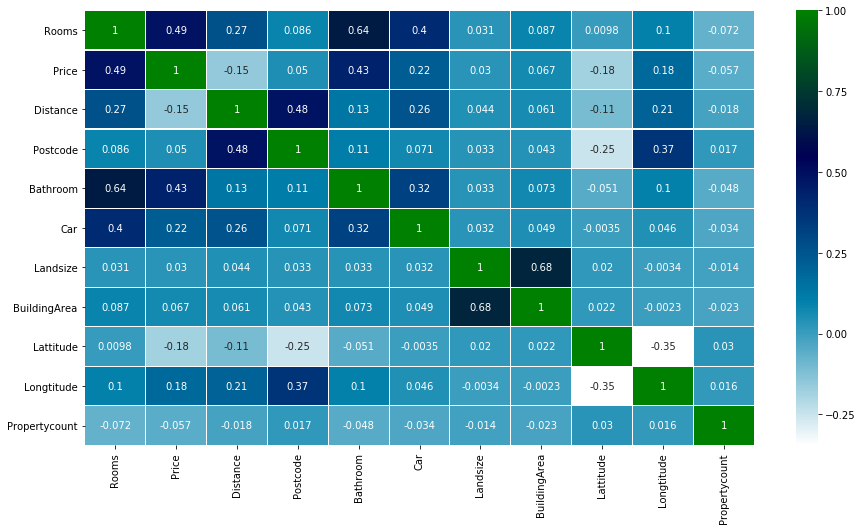

In [53]:
figure = plt.figure(figsize=(15,8))
sns.heatmap(mh.corr(), cmap ='ocean_r', linewidth = 0.1, annot=True)

In [54]:
mh.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,938143.0,SS,Jellis,3/09/2016,2.5,3067.0,1.0,1.0,126.0,89.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,205.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,878520.0,VB,Rounds,4/02/2016,2.5,3067.0,2.0,1.0,447.0,120.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [55]:
mh.drop('Bedroom2', axis =1, inplace=True)

KeyError: "['Bedroom2'] not found in axis"

In [ ]:
# mh.to_csv('Melbourne_House_Clean.csv')